We load the data set, rename columns for convenience and clean the geometry. Each row contains one geo-referenced accident in Berlin 2019.

<AxesSubplot:>

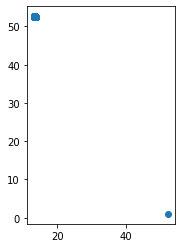

In [17]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv("data/accidents_berlin_2019.csv", encoding="latin-1", sep=";")
df.rename(columns = {"UJAHR": "year", "LOR": "lor_key", "XGCSWGS84": "lon", "YGCSWGS84": "lat"}, inplace=True)
df.lon = pd.to_numeric([x.replace(',','.') for x in df["lon"]]) # german to english float representation, parse string
df.lat = pd.to_numeric([x.replace(',','.') for x in df["lat"]])
df.LINREFY = pd.to_numeric([x.replace(',','.') for x in df["LINREFY"]]) # german to english float representation, parse string

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf.crs = 'epsg:4326'

gdf.plot()

Hm, most points cluster at (13, 52), however one point is at (52, 1). The coordinates for one entry are erroneous.

In [18]:
wrong_index = (gdf.lat == 1)
gdf.loc[wrong_index, "lat"] = gdf.loc[wrong_index, "lon"].values # the values seem to be in the wrong column, we swap them
gdf.loc[wrong_index, "lon"] = gdf.loc[wrong_index, "LINREFY"].values

assert all([str(x)[0:2] == '13' for x in gdf.lon])
assert all([str(y)[0:2] == '52' for y in gdf.lat])

gdf["geometry"] = gpd.points_from_xy(gdf.lon, gdf.lat) # update geom col

gdf = gdf[["year", "lon", "lat", "lor_key", "geometry"]]

gdf.to_file('data/accidents.gpkg', driver='GPKG', layer='accidents2019')